In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e6/sample_submission.csv
/kaggle/input/playground-series-s3e6/train.csv
/kaggle/input/playground-series-s3e6/test.csv


In [2]:
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler,StandardScaler #for standardization


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [3]:
!pip install scikit-plot
from scikitplot.metrics import plot_confusion_matrix, plot_roc

In [4]:
df = pd.read_csv('/kaggle/input/playground-series-s3e6/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e6/test.csv')

In [5]:
df.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22730 non-null  int64  
 1   squareMeters       22730 non-null  int64  
 2   numberOfRooms      22730 non-null  int64  
 3   hasYard            22730 non-null  int64  
 4   hasPool            22730 non-null  int64  
 5   floors             22730 non-null  int64  
 6   cityCode           22730 non-null  int64  
 7   cityPartRange      22730 non-null  int64  
 8   numPrevOwners      22730 non-null  int64  
 9   made               22730 non-null  int64  
 10  isNewBuilt         22730 non-null  int64  
 11  hasStormProtector  22730 non-null  int64  
 12  basement           22730 non-null  int64  
 13  attic              22730 non-null  int64  
 14  garage             22730 non-null  int64  
 15  hasStorageRoom     22730 non-null  int64  
 16  hasGuestRoom       227

In [7]:
df.isna().sum()

id                   0
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [8]:
df.nunique()


id                   22730
squareMeters          7319
numberOfRooms          100
hasYard                  2
hasPool                  2
floors                 101
cityCode              7810
cityPartRange           10
numPrevOwners           10
made                    33
isNewBuilt               2
hasStormProtector        2
basement              4903
attic                 5167
garage                 896
hasStorageRoom           2
hasGuestRoom            11
price                 7421
dtype: int64

In [9]:
print('There are {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

There are 22730 rows and 18 columns.


In [10]:
missing_values = df.isnull().sum().sum()
print(f"Number of missing values: {missing_values}")

Number of missing values: 0


In [11]:
continous_feat = df.columns[df.nunique()  > 20]
desc=df[continous_feat].describe().T
display(desc.style.background_gradient(cmap='Oranges', low=0.5, high=1.0))

,count,mean,std,min,25%,50%,75%,max
id,22730.000000,11364.500000,6561.730145,0.000000,5682.250000,11364.500000,17046.750000,22729.000000
squareMeters,22730.000000,46586.218302,49521.244701,89.000000,20392.750000,44484.000000,71547.000000,6071330.000000
numberOfRooms,22730.000000,48.241091,28.226428,1.000000,25.000000,47.000000,75.000000,100.000000
floors,22730.000000,47.305983,47.777207,1.000000,25.000000,45.000000,69.000000,6000.000000
cityCode,22730.000000,50013.795996,30006.637729,3.000000,22936.000000,50414.000000,76291.000000,491100.000000
made,22730.000000,2008.005059,118.826777,1990.000000,2000.000000,2006.000000,2014.000000,10000.000000
basement,22730.000000,5283.646634,3047.084412,4.000000,2977.250000,5359.000000,7746.000000,91992.000000
attic,22730.000000,5067.981698,3097.347939,1.000000,2599.000000,4977.000000,7652.000000,96381.000000
garage,22730.000000,530.469644,274.840604,4.000000,297.000000,515.000000,767.000000,9017.000000
price,22730.000000,4634456.896876,2925163.241469,10313.500000,2041739.100000,4450823.400000,7159919.500000,10004278.300000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level f

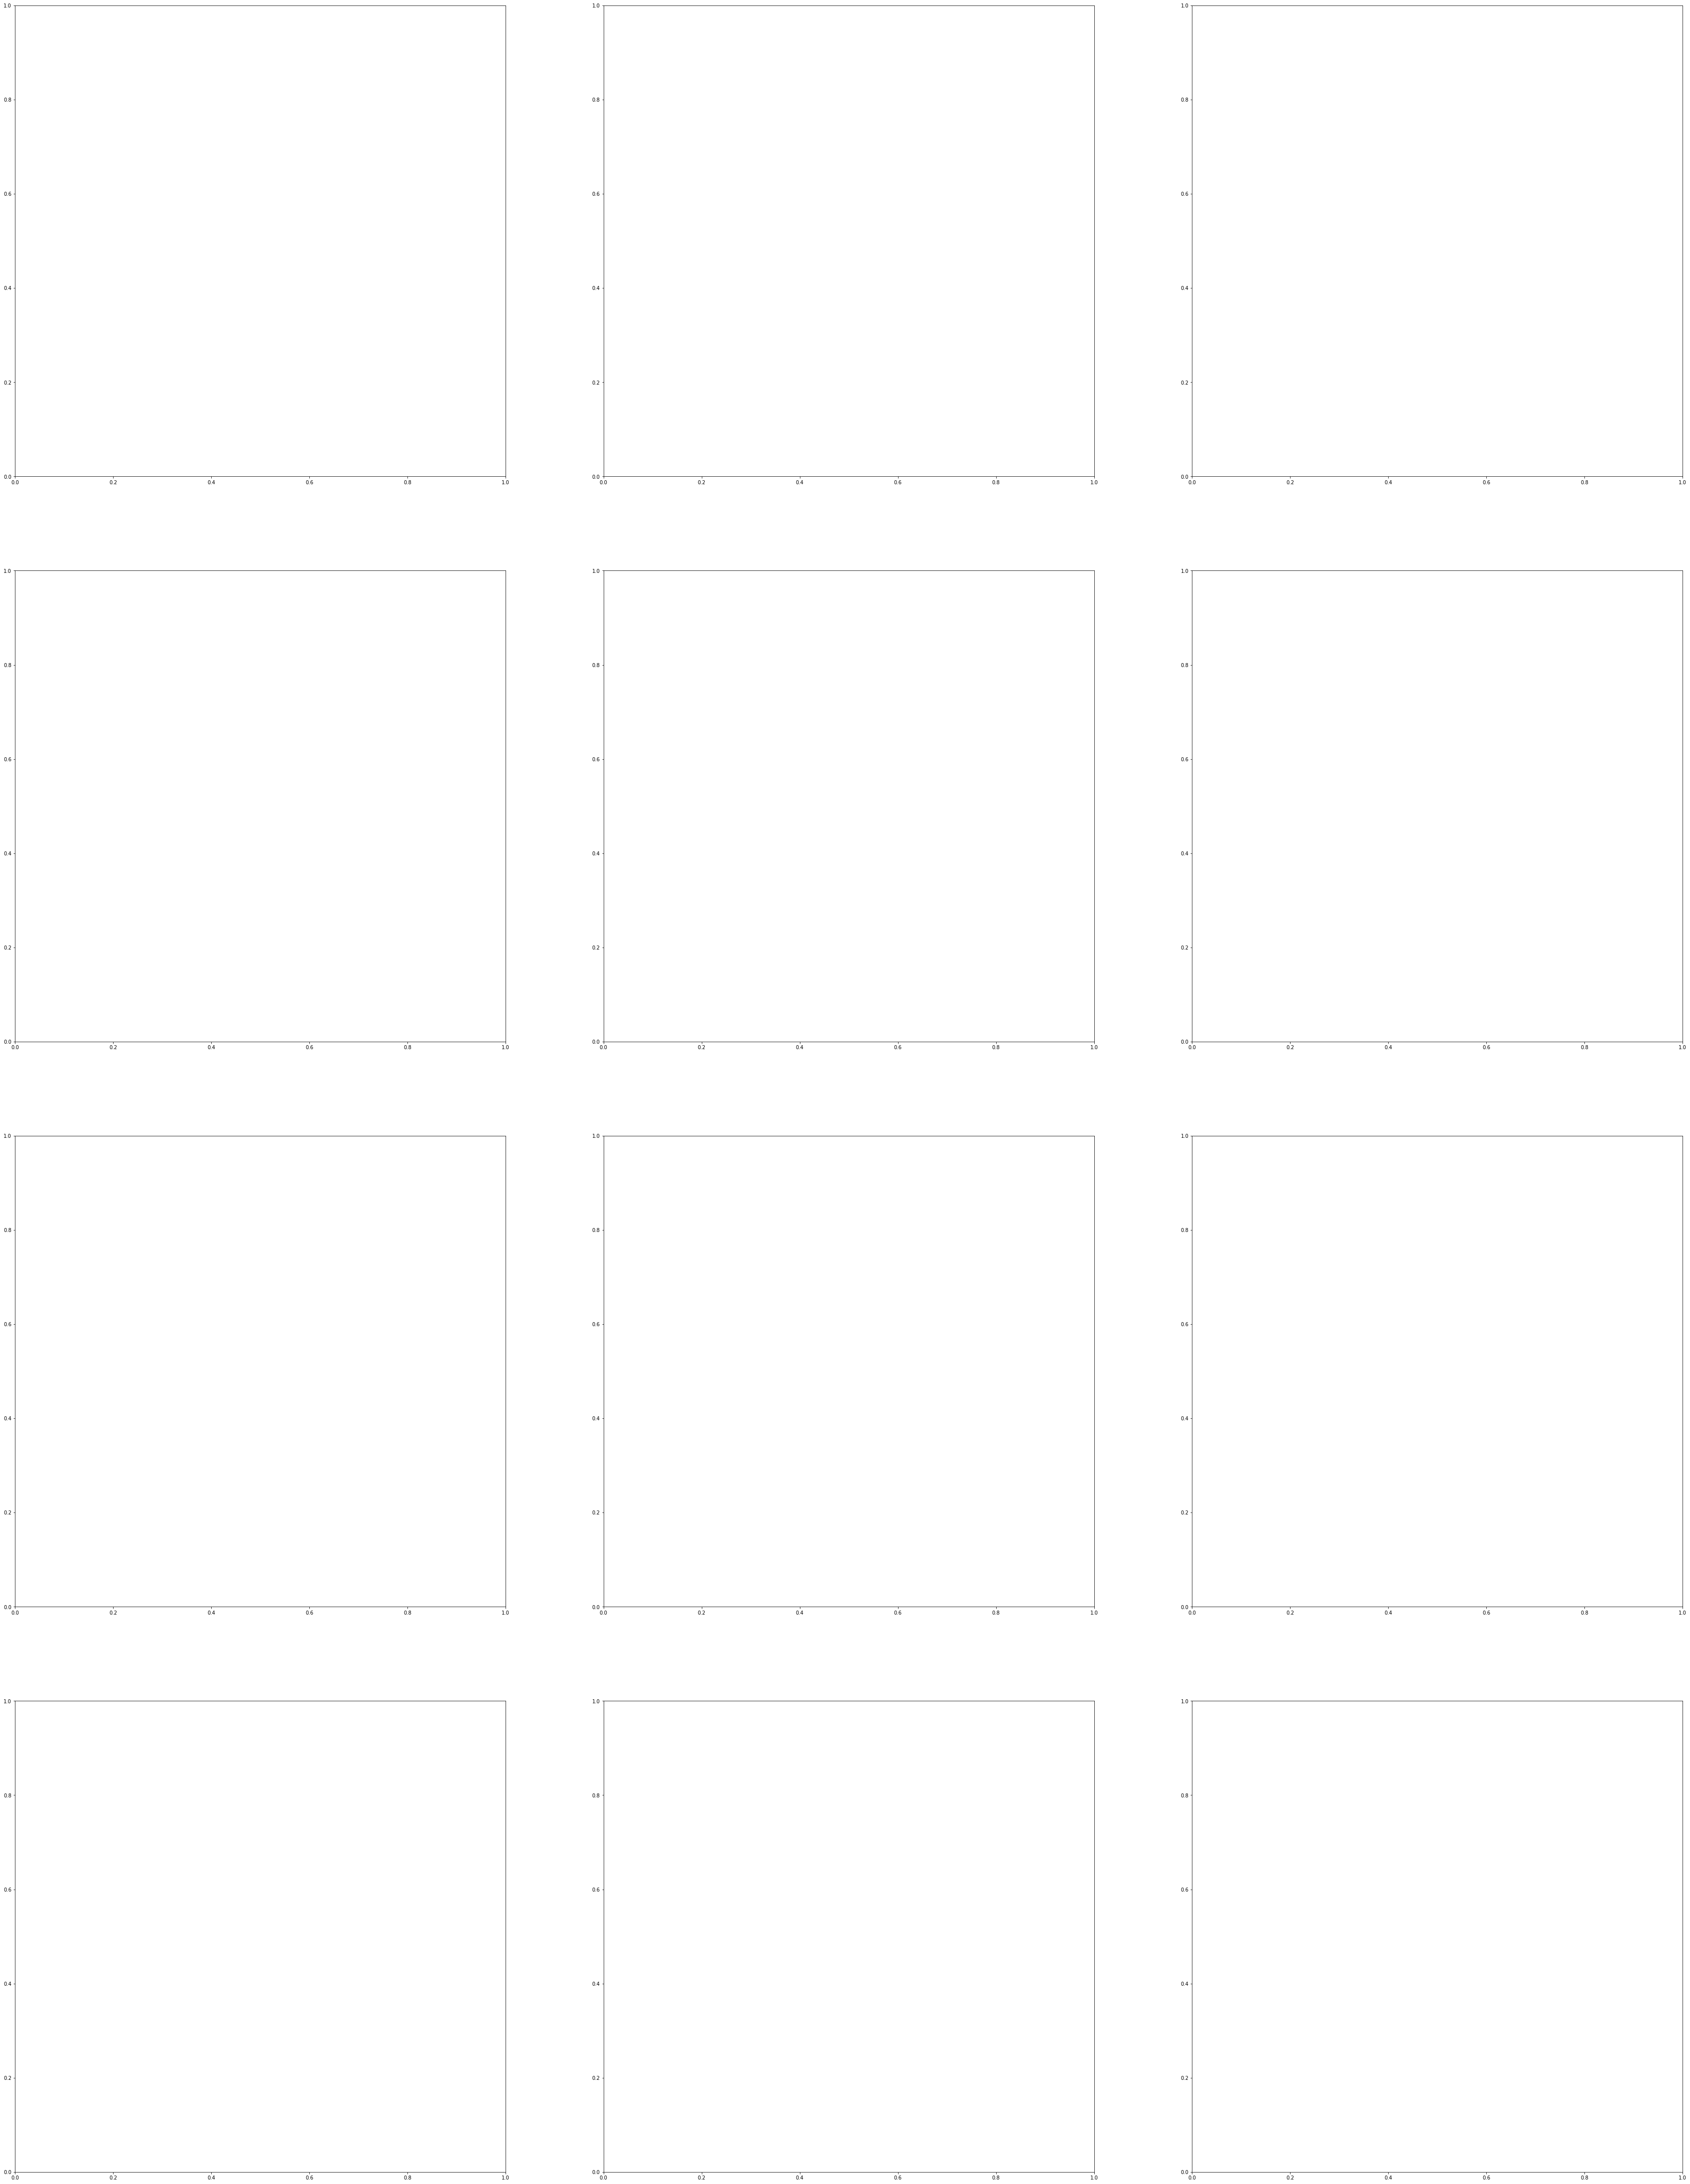

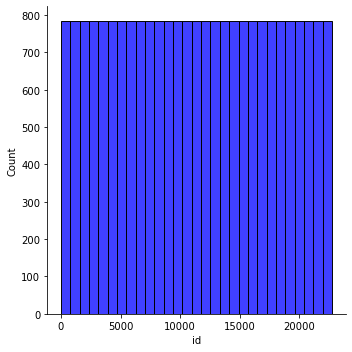

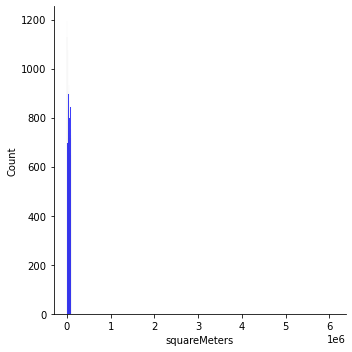

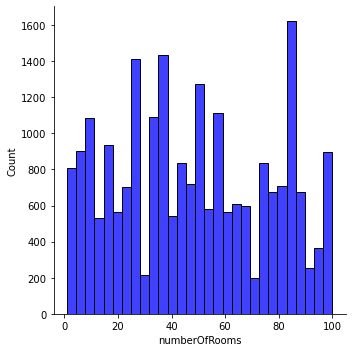

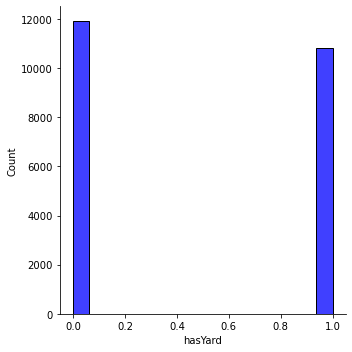

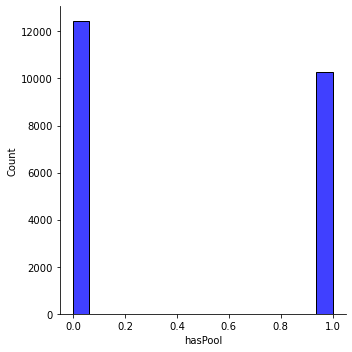

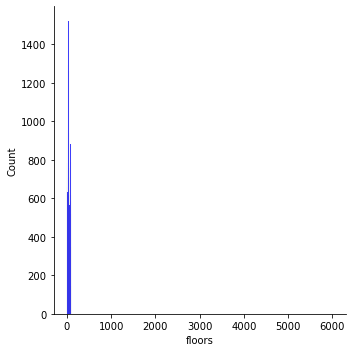

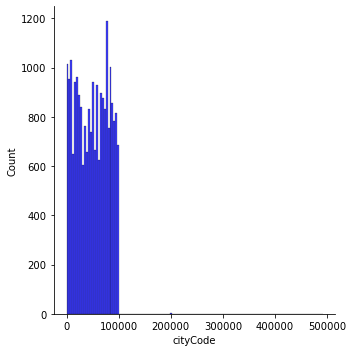

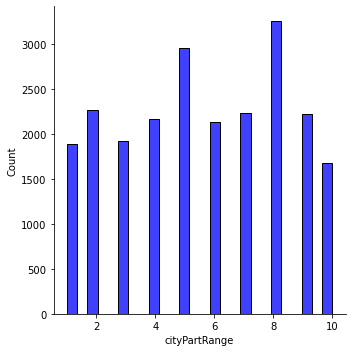

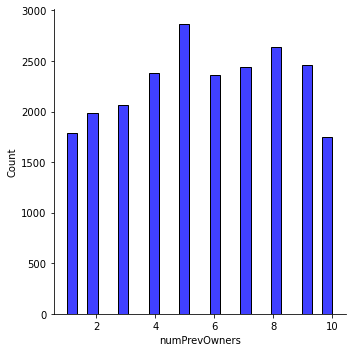

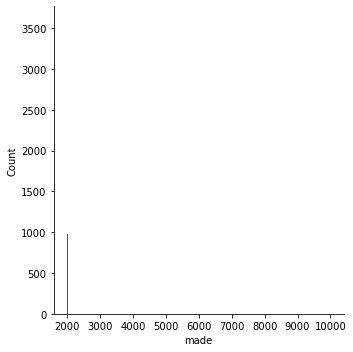

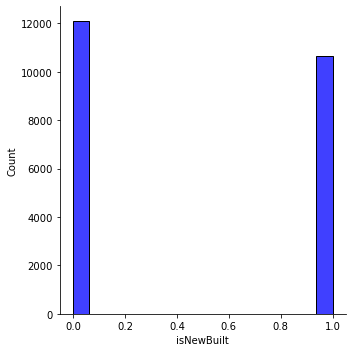

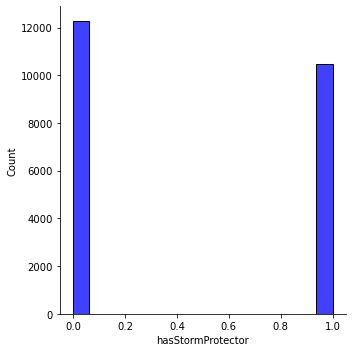

In [12]:
fig, ax = plt.subplots(4,3, figsize = (60,80))
k = 0
cols = list(df.columns)
for i in range(4):
  for j in range(3):
    sns.displot(df[cols[k]], ax = ax[i][j], color = 'blue')
    k += 1
plt.show()

<AxesSubplot:>

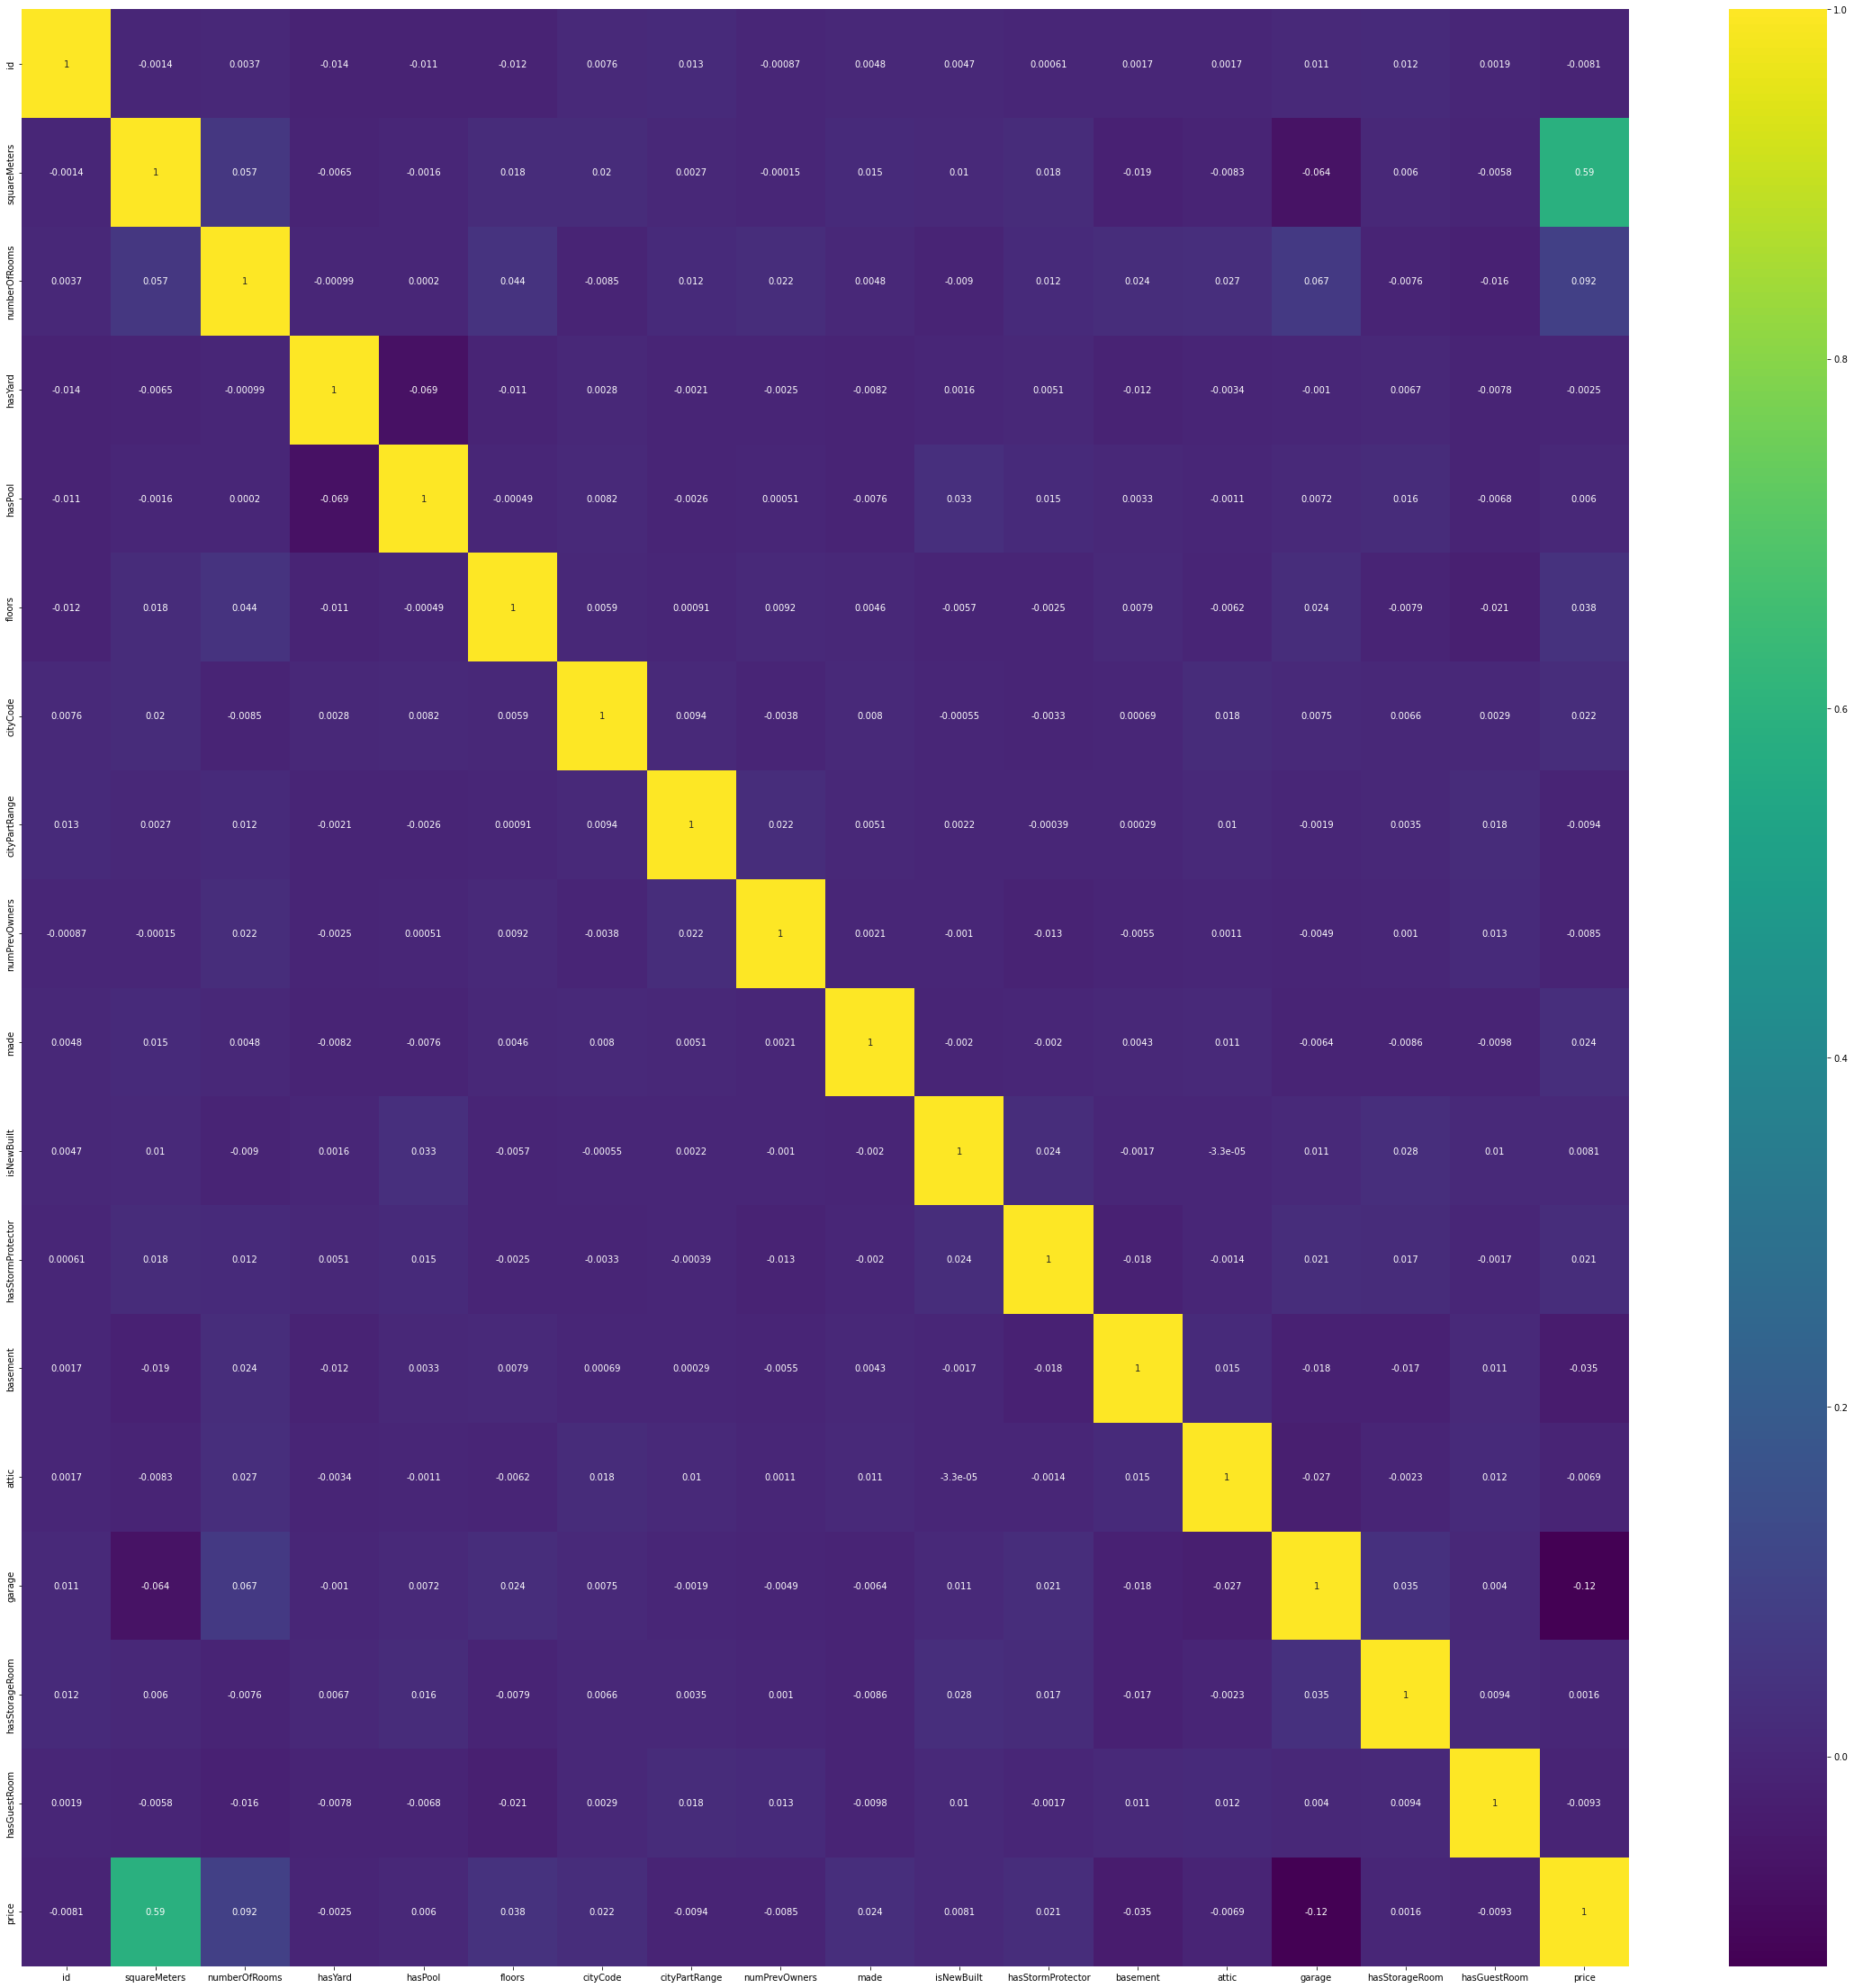

In [13]:
plt.figure(figsize = (40,40))
sns.heatmap(df.corr(), annot= True, cmap = 'viridis')

<AxesSubplot:>

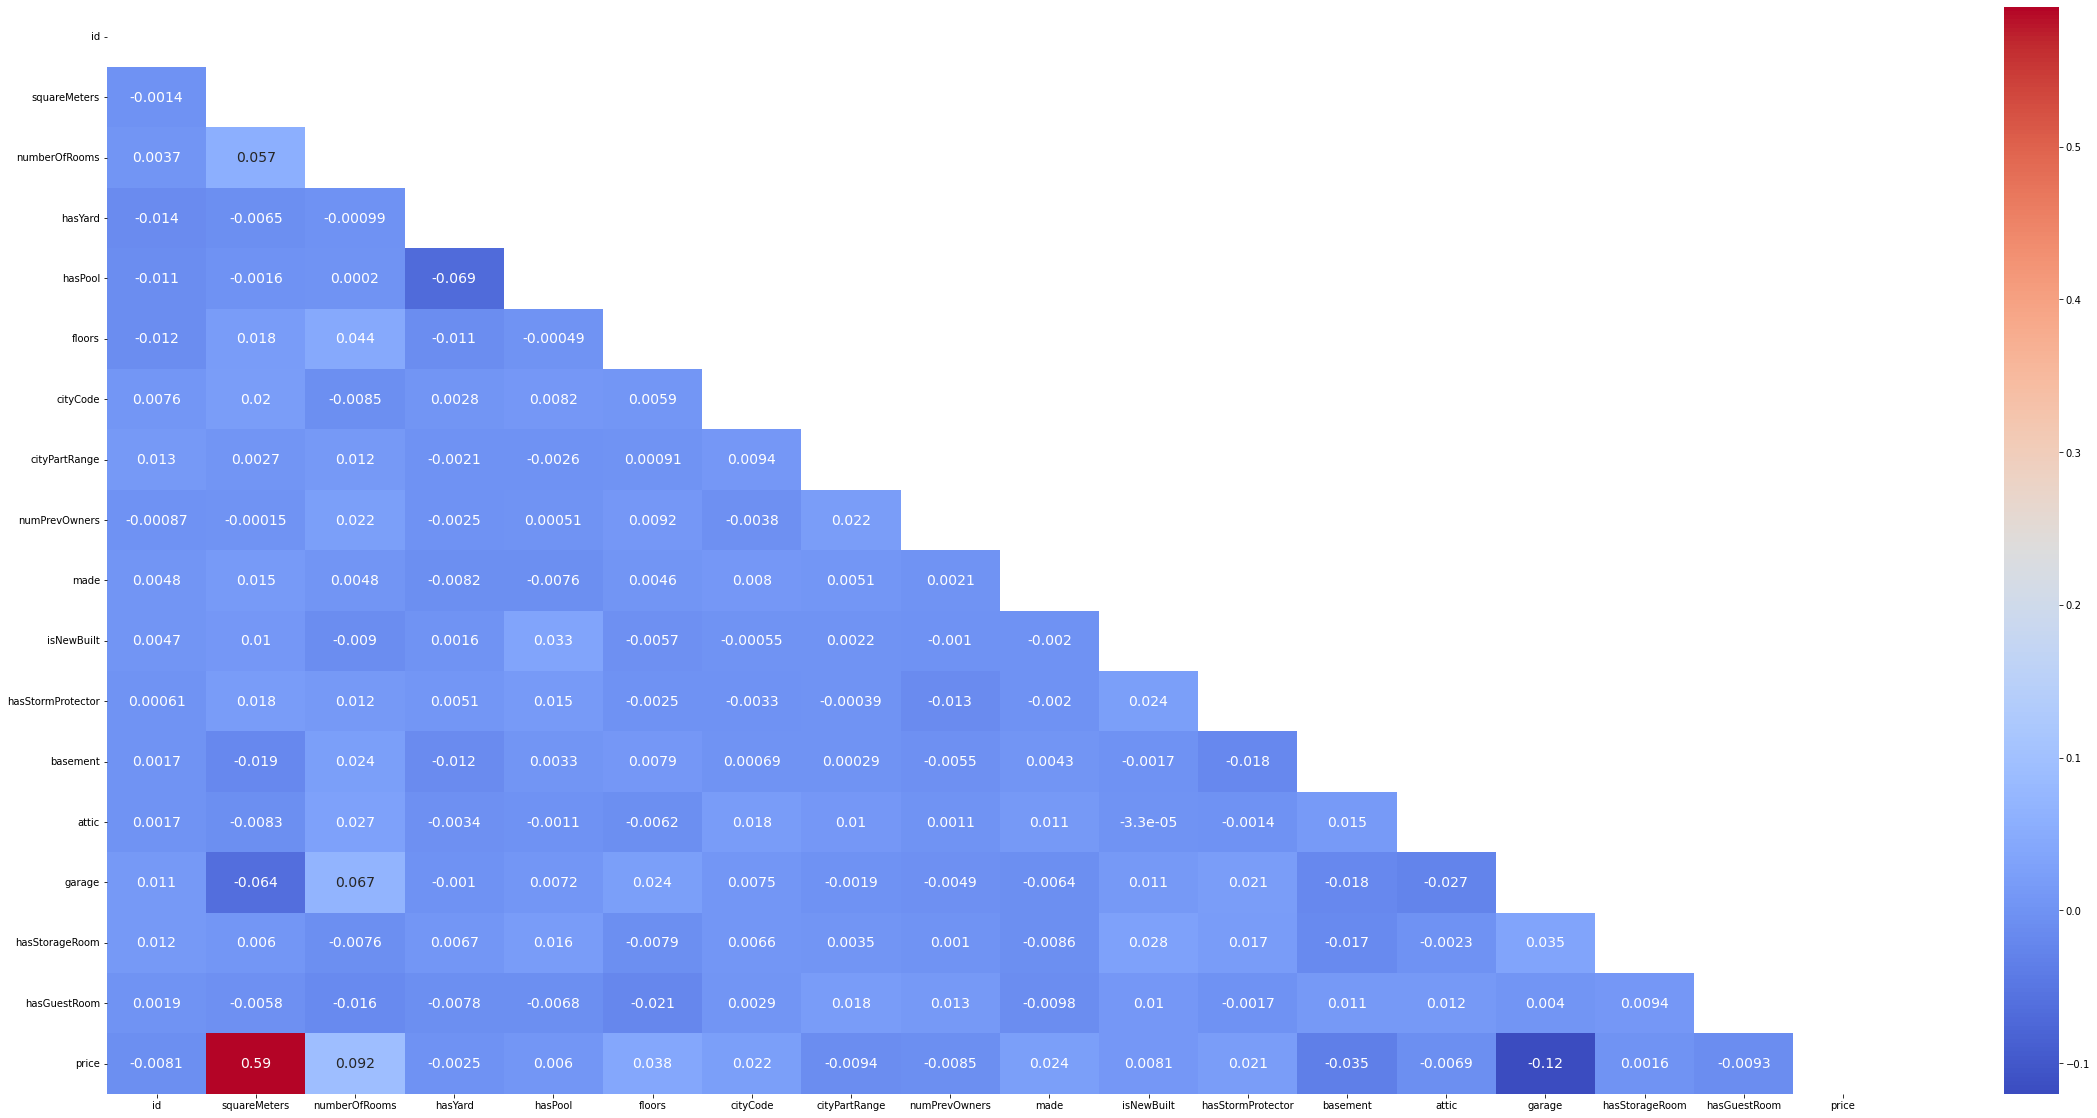

In [14]:
plt.figure(figsize =(40,20))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot = True, mask = mask, cmap = "coolwarm", annot_kws={'size': 14})

In [15]:
from sklearn.model_selection import train_test_split
x = df.drop(['price','id'],axis=1)
y= df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [16]:
display(x_train.shape)
display(x_test.shape)
display(y_train.shape)
display(y_test.shape)

(18184, 16)

(4546, 16)

(18184,)

(4546,)

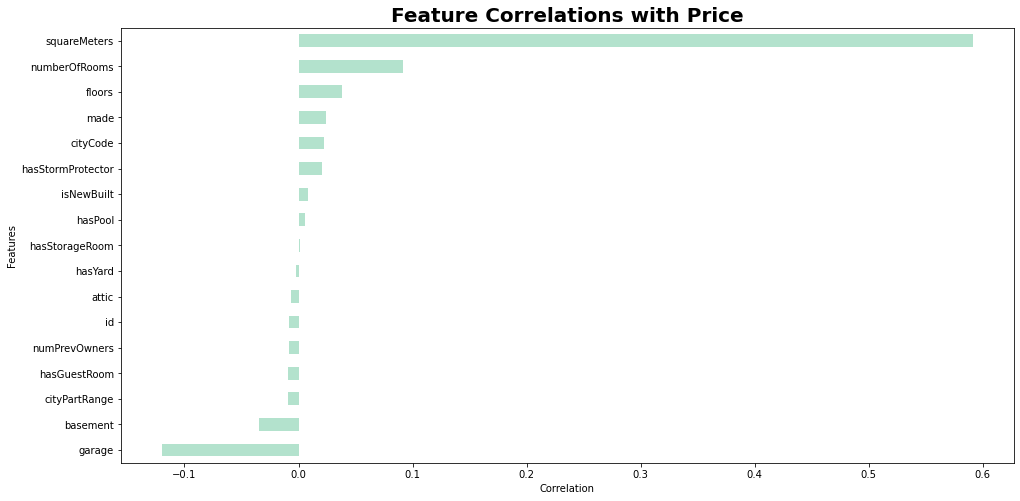

In [17]:
colors = sns.color_palette("Pastel2")

corr_feat = df.corr()
fig, ax = plt.subplots(figsize=(16,8))

corr_feat["price"][:-1].sort_values().plot(kind="barh", color=colors[0])

ax.set_xlabel('Correlation')
ax.set_ylabel('Features')

ax.set_title('Feature Correlations with Price', fontweight='bold', fontsize=20)

plt.show()

In [18]:
x_train.shape

(18184, 16)

In [19]:
from keras.models import Sequential
from keras.layers import Dense

# Define the neural network architecture
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model with an optimizer, loss function and metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model on the training data
history = model.fit(x_train, y_train, epochs=300, batch_size=32, validation_data=(x_test, y_test))

2023-02-20 19:00:21.692015: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 19:00:21.697299: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 19:00:21.698670: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 19:00:21.700900: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/300
569/569 [==============================] - 3s 3ms/step - loss: 22523563474944.0000 - mse: 22523563474944.0000 - val_loss: 3330605842432.0000 - val_mse: 3330605842432.0000
Epoch 2/300
569/569 [==============================] - 2s 3ms/step - loss: 8808630845440.0000 - mse: 8808630845440.0000 - val_loss: 83522936832.0000 - val_mse: 83522936832.0000
Epoch 3/300
569/569 [==============================] - 2s 3ms/step - loss: 12977961959424.0000 - mse: 12977961959424.0000 - val_loss: 756750090240.0000 - val_mse: 756750090240.0000
Epoch 4/300
569/569 [==============================] - 1s 2ms/step - loss: 5514091560960.0000 - mse: 5514091560960.0000 - val_loss: 916835598336.0000 - val_mse: 916835598336.0000
Epoch 5/300
569/569 [==============================] - 2s 3ms/step - loss: 3705078546432.0000 - mse: 3705078546432.0000 - val_loss: 504576704512.0000 - val_mse: 504576704512.0000
Epoch 6/300
569/569 [==============================] - 2s 3ms/step - loss: 3323868479488.0000 - mse: 

In [20]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(x_test)
mse = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 22003.1267300795
Mean Absolute Error: 22003.1267300795


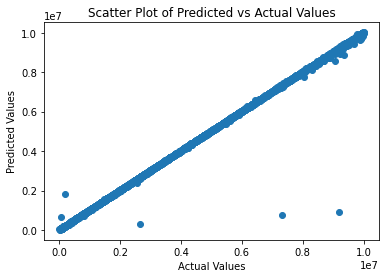

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

In [22]:
testx=test_df.drop(["id"],axis=1)
ids = test_df[["id"]]
ids

,id
0,22730
1,22731
2,22732
3,22733
4,22734
...,...
15149,37879
15150,37880
15151,37881
15152,37882


In [23]:
pred_final = model.predict(testx)
test_df["price"]=pred_final
test_df["id"] = ids


In [24]:
pred_df = test_df[["id", "price"]]
pred_df

,id,price
0,22730,4794962.000
1,22731,6237986.000
2,22732,9082528.000
3,22733,1643584.000
4,22734,6765648.500
...,...,...
15149,37879,8625763.000
15150,37880,4611759.500
15151,37881,7376753.500
15152,37882,7787759.000


In [25]:
pred_df.to_csv("submission.csv", index=False)